In [7]:
import pandas as pd
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
from geobr import read_municipality


In [5]:
#!pip install geobr

In [8]:
muni =geobr.read_municipality(code_muni="PR", year=2020)

In [14]:
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,4100103.0,Abatiá,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.22465 -23.22603, -50.22826..."
1,4100202.0,Adrianópolis,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-48.99969 -24.63712, -49.00061..."
2,4100301.0,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541..."
3,4100400.0,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277..."
4,4100459.0,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153..."


<Axes: >

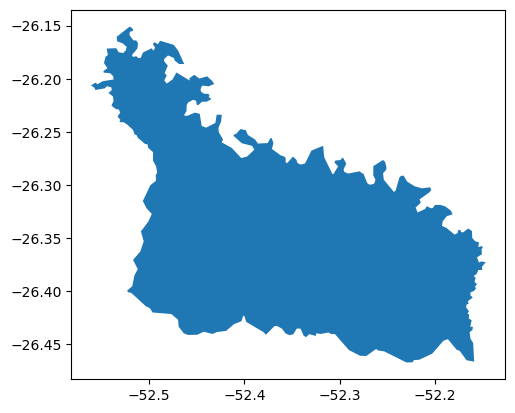

In [16]:
gdf_muni = muni[muni.name_muni== "Clevelândia"]
gdf_muni.plot()

In [17]:
#definir sistema de projeção
gdf_muni.crs ='EPSG:4326'

In [27]:
uc_gdf = geobr.read_conservation_units(date = 201909, simplified = True, verbose = False)
uc_gdf.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,NaN,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,NaN,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,NaN,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,NaN,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [20]:
uc_gdf.crs ='EPSG:4326'

In [21]:
#conferindo os sistemas
uc_gdf.crs == gdf_muni.crs

True

In [22]:
uc_gdf_cl = gpd.sjoin(uc_gdf,gdf_muni)
uc_gdf_cl

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,...,date,geometry,index_right,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region
1126,261,ESTAÇÃO ECOLÓGICA DE MATA PRETA,351803,Estação Ecológica,PI,federal,2005,389,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 20/10/2005,...,201909.0,"MULTIPOLYGON (((-52.22838 -26.50559, -52.23071...",77,4105706.0,Clevelândia,41.0,PR,Paraná,4.0,Sul


<Axes: >

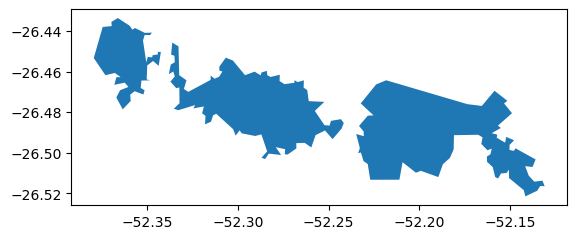

In [23]:
uc_gdf_cl.plot()

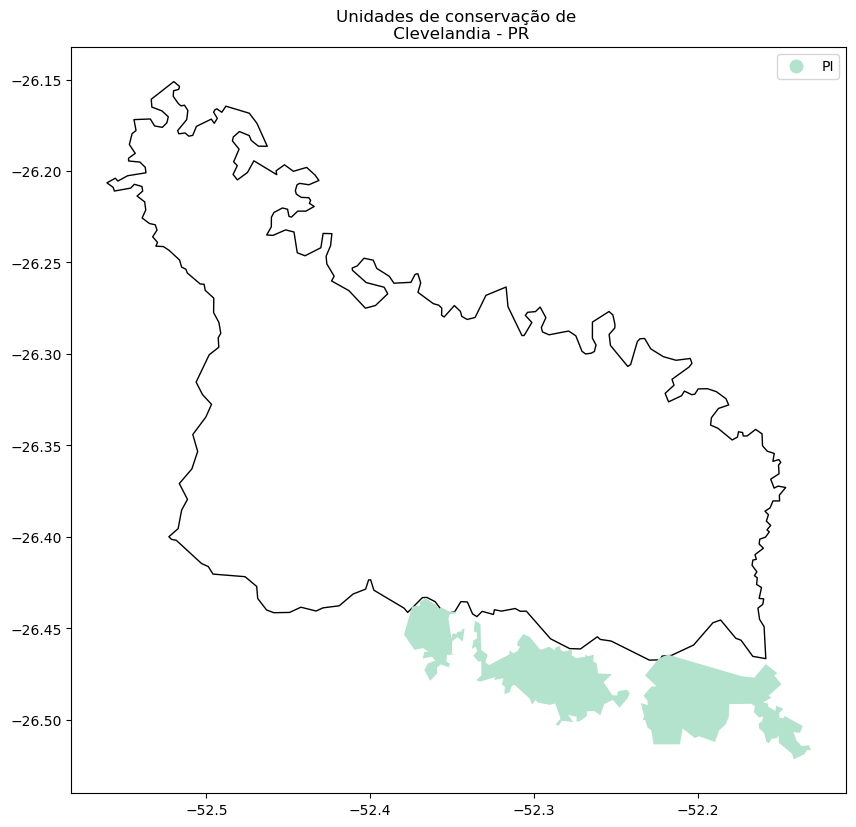

In [28]:
fig, ax = plt.subplots(figsize=(10,12))
base = gdf_muni.plot(ax=ax, color='white', edgecolor='black')
uc_gdf_cl.plot(ax=base, column='group', legend=True, cmap='Pastel2')
ax.set_title('Unidades de conservação de \n Clevelandia - PR')
plt.show()